# CALIDAD DE DATOS Y CREACION DE DATAMART ANALITICO

## 1.1 Set Up

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True

## 1.2 Carga de datos

### 1.2.1.1 Planta 1 - Generacion

In [104]:
p1g = pd.read_csv('../Datos/Plant_1_Generation_Data.csv')
p1g.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00


### 1.2.1.2 Planta 2 - Generacion

In [105]:
p2g = pd.read_csv('../Datos/Plant_2_Generation_Data.csv')
p2g.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00


### 1.2.1.3 Planta 1 - Sensores

In [106]:
p1w = pd.read_csv('../Datos/Plant_1_Weather_Sensor_Data.csv')
p1w.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.94,22.59,0.00


### 1.2.1.4 Planta 2 - Sensores

In [107]:
p2w = pd.read_csv('../Datos/Plant_2_Weather_Sensor_Data.csv')
p2w.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00


## 1.3 Calidad de Datos

### 1.3.1  Planta 1

#### 1.3.1.1 Generacion Planta 1

In [108]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


- No tenemos nulos.

- DATE_TIME es un objeto y es una fecha

In [109]:
p1g['DATE_TIME'] = pd.to_datetime(p1g.DATE_TIME,dayfirst = True)

In [110]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [111]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00


Comprobamos que el identificador de planta PLANT_ID es unico

In [112]:
p1g.PLANT_ID.unique()

array([4135001], dtype=int64)

Cambiamos el identificador de la planta a un formato mas legible.

In [113]:
p1g['PLANT_ID'] = p1g.PLANT_ID.replace(4135001 	, 'p1')

- Analisis descriptivo

In [114]:
p1g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,68778,2020-06-01 08:02:49.458256896,2020-05-15 00:00:00,2020-05-24 00:45:00,2020-06-01 14:30:00,2020-06-09 20:00:00,2020-06-17 23:45:00,NaN
DC_POWER,68778.00,3147.43,0.00,0.00,429.00,6366.96,14471.12,4036.46
AC_POWER,68778.00,307.80,0.00,0.00,41.49,623.62,1410.95,394.40
DAILY_YIELD,68778.00,3295.97,0.00,0.00,2658.71,6274.00,9163.00,3145.18
TOTAL_YIELD,68778.00,6978711.76,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00,416271.98


Formateamos data para visualizarla sin notacion cientifica

In [115]:
pd.options.display.float_format = '{:15.2f}'.format

In [116]:
p1g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,68778,2020-06-01 08:02:49.458256896,2020-05-15 00:00:00,2020-05-24 00:45:00,2020-06-01 14:30:00,2020-06-09 20:00:00,2020-06-17 23:45:00,NaN
DC_POWER,68778.00,3147.43,0.00,0.00,429.00,6366.96,14471.12,4036.46
AC_POWER,68778.00,307.80,0.00,0.00,41.49,623.62,1410.95,394.40
DAILY_YIELD,68778.00,3295.97,0.00,0.00,2658.71,6274.00,9163.00,3145.18
TOTAL_YIELD,68778.00,6978711.76,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00,416271.98


**Conclusiones Preliminares**
  
* En la transformacion de AC a DC hay perdida, pero en nuestro caso tenemos 300 y 3000. Tenemos una perdida de un 90%

* Comprobar existencia de atipicos, comprobamos la mediana y vemos que tenemos 40 sobre 400. La perdida del 90% se mantiene

* Historicamente la eficiencia tendria que estar sobre el 90%.

* Se prodece a graficar ambas para visionar que sucede.

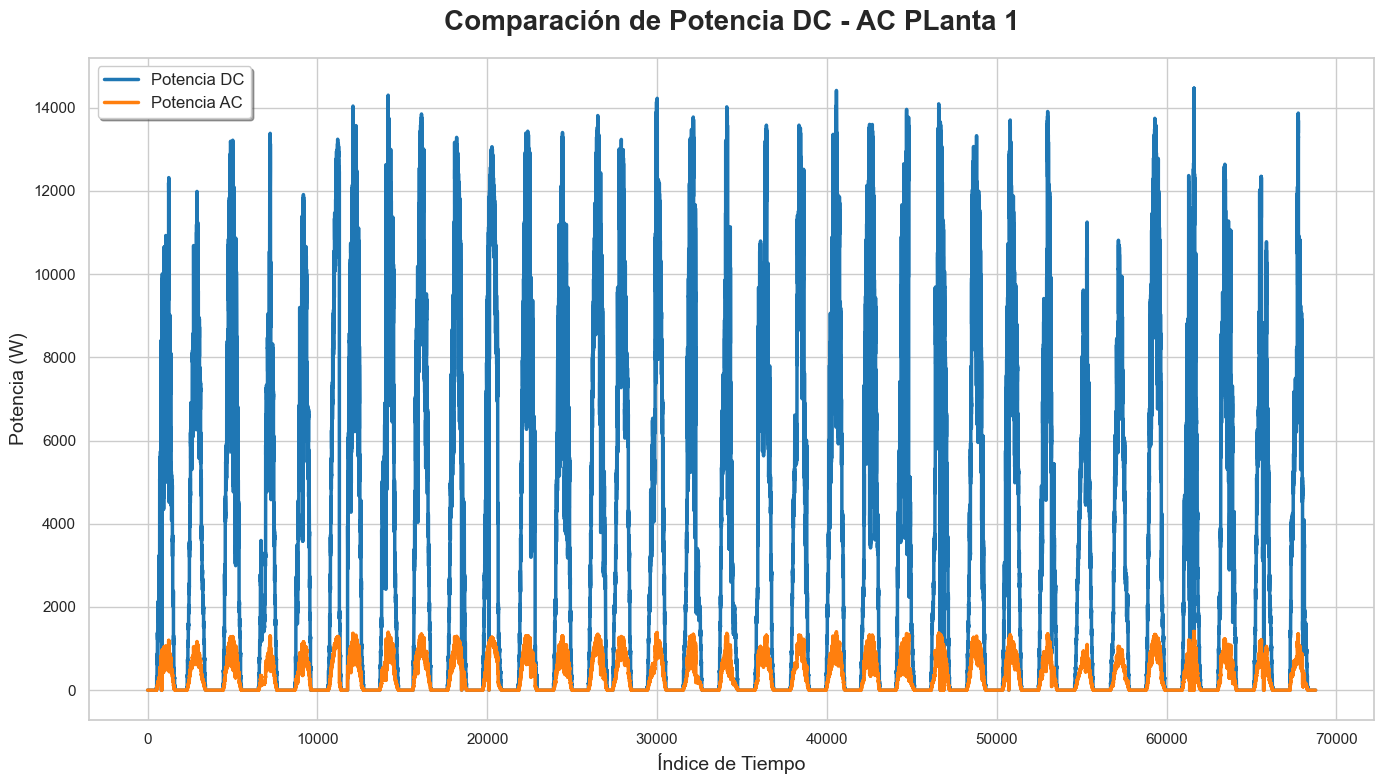

In [117]:
# Estilo elegante de seaborn
sns.set(style='whitegrid')

# Tamaño de la figura
plt.figure(figsize=(14, 8))

# Colores personalizados
colors = ['#1f77b4', '#ff7f0e']  # Azul y naranja

# Trazamos las columnas
p1g['DC_POWER'].plot(label='Potencia DC', color=colors[0], linewidth=2.5)
p1g['AC_POWER'].plot(label='Potencia AC', color=colors[1], linewidth=2.5)

# Título y etiquetas con fuente más grande
plt.title('Comparación de Potencia DC - AC PLanta 1', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Índice de Tiempo', fontsize=14)
plt.ylabel('Potencia (W)', fontsize=14)

# Leyenda con estilo
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

# Ajuste de márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [118]:
p1g.DC_POWER.corr(p1g.AC_POWER)

0.9999962553331414

Ambas corrientes interactuan en la misma direccion como era logico presumir.

In [119]:
(p1g.DC_POWER/p1g.AC_POWER).describe()

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

**CONCLUSIONES**

* Tenemos una diferencia de escala 10 veces, y se mantene constante a traves de todos los cuartiles.

* Los inverters estan transformando unicamente el 10% de DC a AC.

* No hay atipicos relevantes

Analizamos SOURCE_KEY que son las claves de los inverters de la planta, y vamos  a ver cuantos hay.

In [120]:
print ("Tenemos: {} inverters en la planta 1 ".format(p1g.SOURCE_KEY.nunique()))

Tenemos: 22 inverters en la planta 1 


In [121]:
inverter_data = p1g.SOURCE_KEY.value_counts()
inverter_data

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

**<U>Análisis Preliminar – Datos de Producción de Planta 1</U>**
    
**<U>1 Descripción Inicial</U>**

* La Planta 1 cuenta con 22 inversores (inverters) registrados.

* Cada inversor dispone de un volumen similar de datos, aunque no idéntico.

* Las diferencias podrían deberse a:

    - Interrupciones por mantenimiento programado o correctivo.

    - Pérdidas de datos por fallos en sensado, almacenamiento o transmisión.

* Este comportamiento será revisado más a fondo en la fase de análisis exploratorio (EDA).

**<U>2. Variables de Producción Analizadas</U>**

* Se dispone de dos variables clave:

    - TOTAL_YIELD: producción total acumulada por inversor.

    - DAILY_YIELD: producción diaria, sin especificar si es a nivel de inversor o planta.
 
  Hipótesis de Trabajo sobre la Variable DAILY_YIELD

    Se desconoce si la variable DAILY_YIELD representa un valor agregado a nivel de planta o si corresponde a la producción diaria individual de cada inversor.

**<U>Para esclarecer esto, planteamos la siguiente hipótesis:</U>**

    Hipótesis: Si DAILY_YIELD está registrada a nivel de planta, entonces todos los inversores deberían reportar el mismo valor para una misma marca temporal.

    En cambio, si se observan diferencias entre inversores en el mismo instante temporal, esto implicaría que DAILY_YIELD está registrada a nivel de inversor individual.

    Para validar esta hipótesis, se analizará una muestra de inversores y se compararán sus valores de DAILY_YIELD en un mismo día.

- Obtenemos un describe sobre los inverters para ver sus metricas.

- Puede observarse que la media es 3126 y la desviacion tipica es baja 11 lecturas.

- Los datos son bastante homogeneos y la distribucion tambien lo es en sus cuartiles.

In [122]:
inverter_data.describe().T

count             22.00
mean            3126.27
std               11.00
min             3104.00
25%             3120.00
50%             3124.50
75%             3129.00
max             3155.00
Name: count, dtype: float64

In [123]:
p1g.describe()[['DAILY_YIELD', 'TOTAL_YIELD']].T

,count,mean,min,25%,50%,75%,max,std
DAILY_YIELD,68778.00,3295.97,0.00,0.00,2658.71,6274.00,9163.00,3145.18
TOTAL_YIELD,68778.00,6978711.76,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00,416271.98


En la documentacion no queda claro si daily_yield es el total por inverter o el total de planta.

In [124]:
seleccion_inverters = list(p1g.SOURCE_KEY.unique()[:5])
seleccion_inverters

['1BY6WEcLGh8j5v7',
 '1IF53ai7Xc0U56Y',
 '3PZuoBAID5Wc2HD',
 '7JYdWkrLSPkdwr4',
 'McdE0feGgRqW7Ca']

In [125]:
temp = p1g[p1g.SOURCE_KEY.isin(seleccion_inverters)].set_index('DATE_TIME')
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...
2020-06-17 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,5521.00,6485319.00
2020-06-17 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,6034.00,6433566.00
2020-06-17 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,6052.00,7237425.00


Podemos ver que para una misma fecha hay lecturas diferentes, podemos concluir que daily_yield es una lectura por cada uno de los inverters.
por separado que se agregan al TOTAL_YIELD.

Lo volvemos a comprobar visualmente, definimos un intervalo de tiempo y procedemos a graficarlo.

In [126]:
temp = temp.loc['2020-06-01':'2020-06-05']

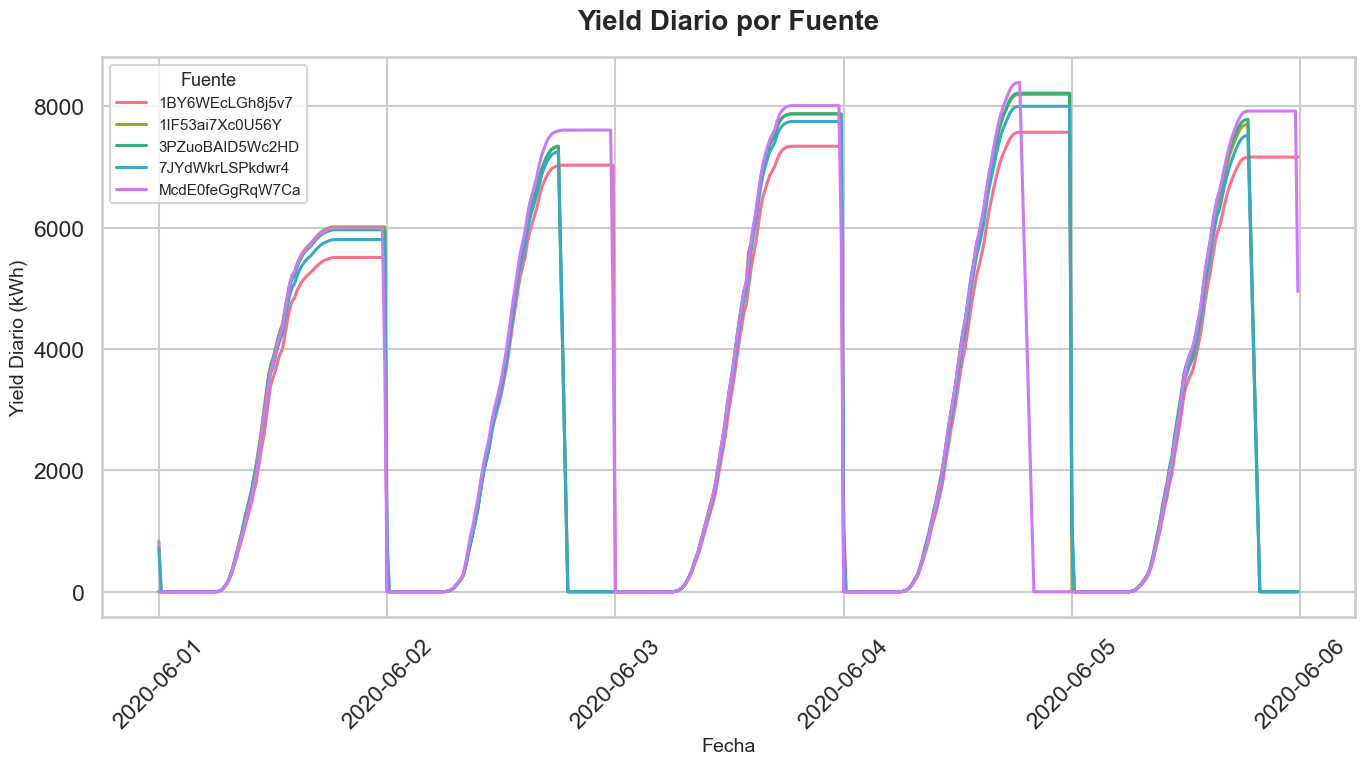

In [127]:
# Estilo bonito y limpio
sns.set(style='whitegrid', context='talk')

# Tamaño del gráfico
plt.figure(figsize=(14, 8))

# Paleta de colores personalizada (opcional)
palette = sns.color_palette('husl', n_colors=temp['SOURCE_KEY'].nunique())

# Línea con diferenciación por fuente
sns.lineplot( data=temp, x=temp.index, y='DAILY_YIELD', hue='SOURCE_KEY', palette=palette, linewidth=2.2,)

# Título y etiquetas
plt.title('Yield Diario por Fuente', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Yield Diario (kWh)', fontsize=14)

# Mejorar visualización del eje x si es datetime
plt.xticks(rotation=45)

# Leyenda con estilo
plt.legend(title='Fuente', title_fontsize=13, fontsize=11, loc='best', frameon=True)

# Ajustar todo para que no se solape
plt.tight_layout()

# Mostrar
plt.show()

Comprobacion de estructura del archivo p1g, hay que comprobar que todas las ventanas de 15 minutos estan consignadas o no.

Para ello comprobamos el reconteo de datos por cada dia 24 * 4 lecturas y ademas por el numero de inverters 22.

Si extraemos un dia comprobamos el numero que tenemos si eso encaja en todo el periodo del dataset es regular si no... no lo es.

In [128]:
p1g.DATE_TIME.dt.date.value_counts().sort_index()

DATE_TIME
2020-05-15    1954
2020-05-16    1934
2020-05-17    2112
2020-05-18    2112
2020-05-19    1990
2020-05-20    1672
2020-05-21    1368
2020-05-22    2028
2020-05-23    1958
2020-05-24    2112
2020-05-25    2060
2020-05-26    2072
2020-05-27    2052
2020-05-28    1980
2020-05-29    1490
2020-05-30    2112
2020-05-31    2106
2020-06-01    2112
2020-06-02    2088
2020-06-03    2094
2020-06-04    2052
2020-06-05    2080
2020-06-06    2052
2020-06-07    2112
2020-06-08    2112
2020-06-09    2112
2020-06-10    2112
2020-06-11    2112
2020-06-12    2112
2020-06-13    2112
2020-06-14    2112
2020-06-15    2112
2020-06-16    2112
2020-06-17    2068
Name: count, dtype: int64

El dataset no es regular.

Lo graficamos.

Si puede apreciarse que el numero de lecturas esta sobre 2000 y hay dias con menos lecturas de lo normal... por algun tipo de incidencia desconocida.

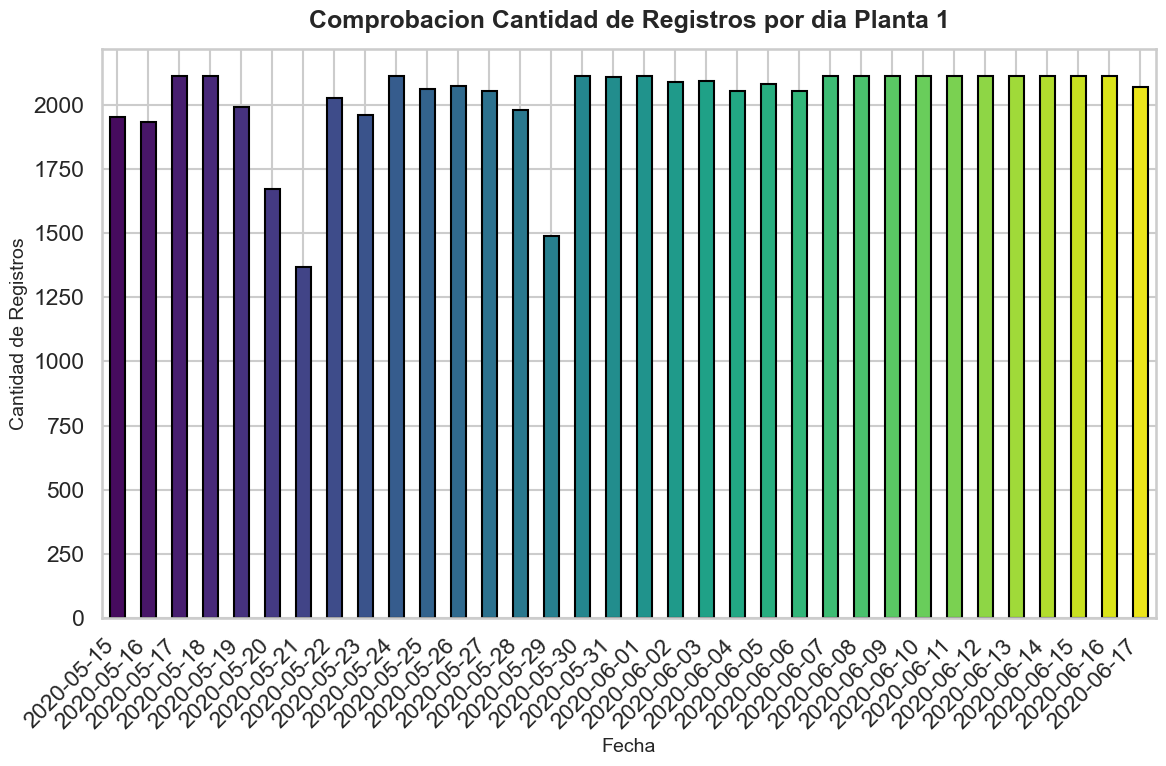

In [129]:
# Estilo estético y limpio
sns.set(style='whitegrid', context='talk')

# Crear la serie de conteo ordenada por fecha
date_counts = p1g.DATE_TIME.dt.date.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8)) 
date_counts.plot.bar(color=sns.color_palette("viridis", len(date_counts)), edgecolor='black')

# Títulos y etiquetas
plt.title('Comprobacion Cantidad de Registros por dia Planta 1', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=14)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar los márgenes
plt.tight_layout()
plt.show()

Al principio vimos que no habia nulos, y ahora se aprecia que hay datos faltantes.

#### 1.3.1.2 Sensores Planta 1

In [130]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [131]:
p1w.DATE_TIME = pd.to_datetime(p1w.DATE_TIME)
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [132]:
p1w.head(2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00


In [133]:
p1w['PLANT_ID'] = p1w.PLANT_ID.replace(4135001,'p1')

In [134]:
p1w.head(2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00


In [135]:
p1w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3182,2020-06-01 05:52:22.080452608,2020-05-15 00:00:00,2020-05-23 22:48:45,2020-06-01 09:52:30,2020-06-09 16:56:15,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3182.00,25.53,20.40,22.71,24.61,27.92,35.25,3.35
MODULE_TEMPERATURE,3182.00,31.09,18.14,21.09,24.62,41.31,65.55,12.26
IRRADIATION,3182.00,0.23,0.00,0.00,0.02,0.45,1.22,0.30


In [136]:
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,p1,HmiyD2TTLFNqkNe,22.15,21.48,0.00
3178,2020-06-17 23:00:00,p1,HmiyD2TTLFNqkNe,22.13,21.39,0.00
3179,2020-06-17 23:15:00,p1,HmiyD2TTLFNqkNe,22.01,20.71,0.00
3180,2020-06-17 23:30:00,p1,HmiyD2TTLFNqkNe,21.97,20.73,0.00


In [137]:
p1w.SOURCE_KEY.nunique()

1

Hay un unico sensor por planta.

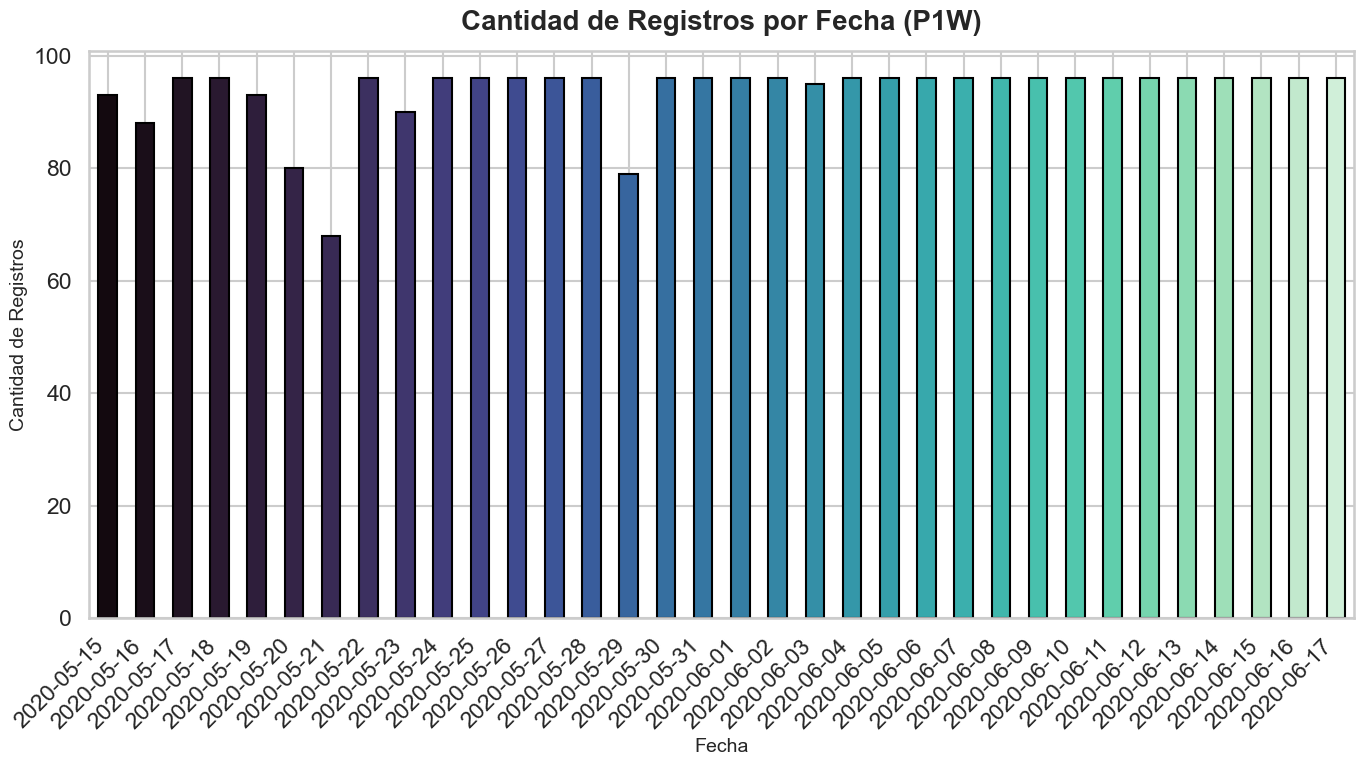

In [138]:
# Estilo más profesional
sns.set(style='whitegrid', context='talk')

# Conteo de fechas
date_counts = p1w.DATE_TIME.dt.date.value_counts().sort_index()

# Crear figura
plt.figure(figsize=(14, 8))

# Gráfico de barras
date_counts.plot.bar( color=sns.color_palette("mako", len(date_counts)), edgecolor='black')

# Títulos y etiquetas
plt.title('Cantidad de Registros por Fecha (P1W)', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=14)

# Rotar las fechas si hay muchas
plt.xticks(rotation=45, ha='right')

# Ajuste de márgenes
plt.tight_layout()

# Mostrar
plt.show()

**<U>CONCLUSIONES</U>**

* El conjunto de datos abarca el período comprendido entre el 15 de mayo y el 17 de junio de 2020.

* Se confirma la presencia de registros para todos los días dentro de este intervalo; no hay días completamente ausentes.

* Algunos días específicos como el 21/05 o el 29/05 presentan un número reducido de mediciones, lo que indica cierta irregularidad en la frecuencia de muestreo.

* En resumen, aunque el dataset cubre de forma continua el período temporal, no mantiene una cadencia de muestreo 100% uniforme, esto es, no es regular.

### 1.3.2 Planta 2

#### 1.3.2.1 Generacion Planta 2

In [139]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [140]:
p2g['DATE_TIME'] = pd.to_datetime(p2g.DATE_TIME,dayfirst = True)

C:\Users\TrendingPC\AppData\Local\Temp\ipykernel_23300\3142560922.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  p2g['DATE_TIME'] = pd.to_datetime(p2g.DATE_TIME,dayfirst = True)


In [141]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [142]:
p2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00


In [143]:
p2g.PLANT_ID.unique()

array([4136001], dtype=int64)

In [144]:
p2g['PLANT_ID'] = p2g.PLANT_ID.replace(4136001,'p2')

In [145]:
p2g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,67698,2020-06-01 10:44:33.650625024,2020-05-15 00:00:00,2020-05-23 21:00:00,2020-06-01 23:00:00,2020-06-09 23:30:00,2020-06-17 23:45:00,NaN
DC_POWER,67698.00,246.70,0.00,0.00,0.00,446.59,1420.93,370.57
AC_POWER,67698.00,241.28,0.00,0.00,0.00,438.22,1385.42,362.11
DAILY_YIELD,67698.00,3294.89,0.00,272.75,2911.00,5534.00,9873.00,2919.45
TOTAL_YIELD,67698.00,658944788.42,0.00,19964944.87,282627587.00,1348495113.00,2247916295.00,729667771.07


- La media de AC y DC es muy similar en esta planta.

- Si las plantas son similares, estan en una misma zona, con mismos paratmetros de tamaño etc... hay una diferencia entre ellas muy notable.

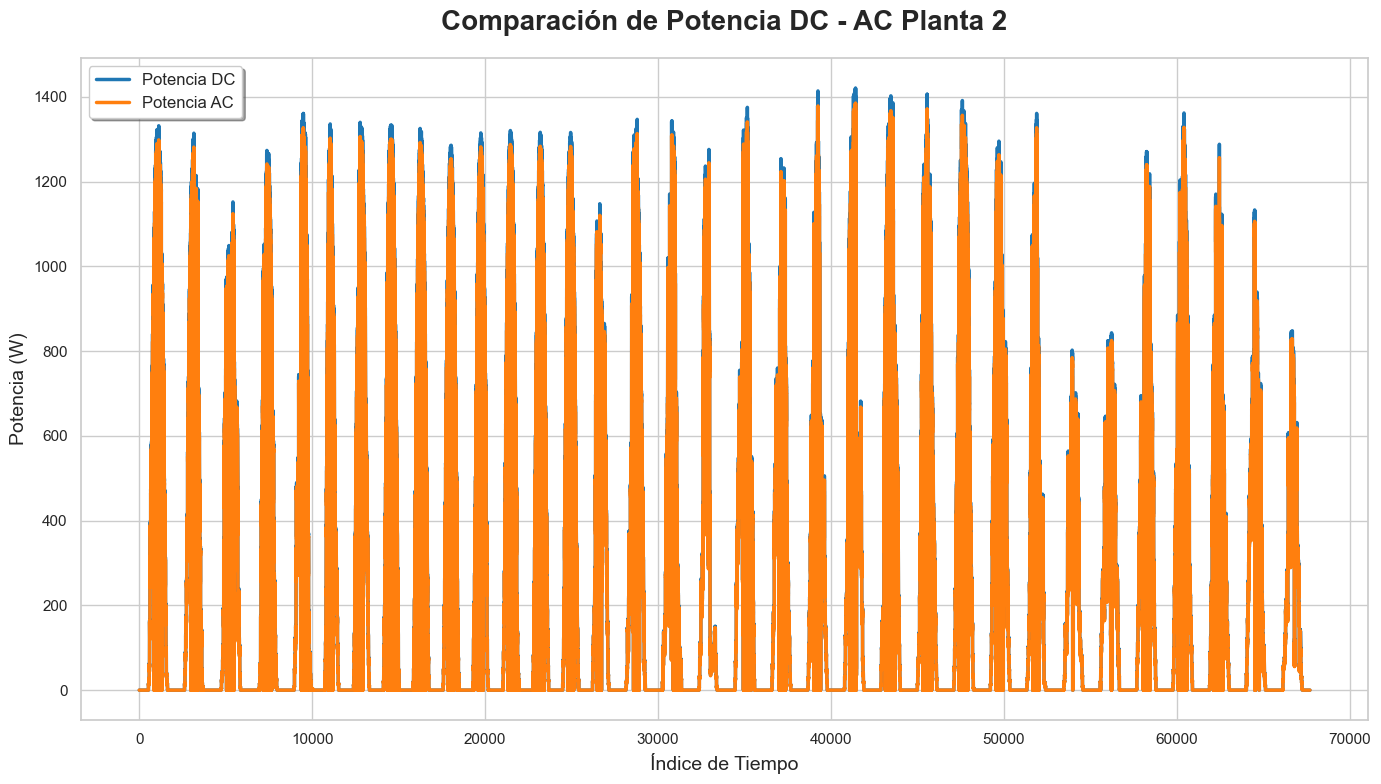

In [146]:
# Estilo elegante de seaborn
sns.set(style='whitegrid')

# Tamaño de la figura
plt.figure(figsize=(14, 8))

# Colores personalizados
colors = ['#1f77b4', '#ff7f0e']  # Azul y naranja

# Trazamos las columnas
p2g['DC_POWER'].plot(label='Potencia DC', color=colors[0], linewidth=2.5)
p2g['AC_POWER'].plot(label='Potencia AC', color=colors[1], linewidth=2.5)

# Título y etiquetas con fuente más grande
plt.title('Comparación de Potencia DC - AC Planta 2', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Índice de Tiempo', fontsize=14)
plt.ylabel('Potencia (W)', fontsize=14)

# Leyenda con estilo
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

# Ajuste de márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

- El grafico de esta planta y el de la primera no tienen nada que ver.

In [147]:
(p2g.DC_POWER/p2g.AC_POWER).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

- Los datos de eficiencia son muy distintos.

In [148]:
p2g.DC_POWER.corr(p2g.AC_POWER)

0.9999966506200945

In [149]:
print ("Tenemos: {} inverters en la planta 1 ".format(p2g.SOURCE_KEY.nunique()))

Tenemos: 22 inverters en la planta 1 


- En tamaño si podemos afirmar que son similares las dos plantas.

In [150]:
inverter2_data = p2g.SOURCE_KEY.value_counts()
inverter2_data

SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

Hay 5 inverters con un numero de medidas significativamente inferior, no es regular.

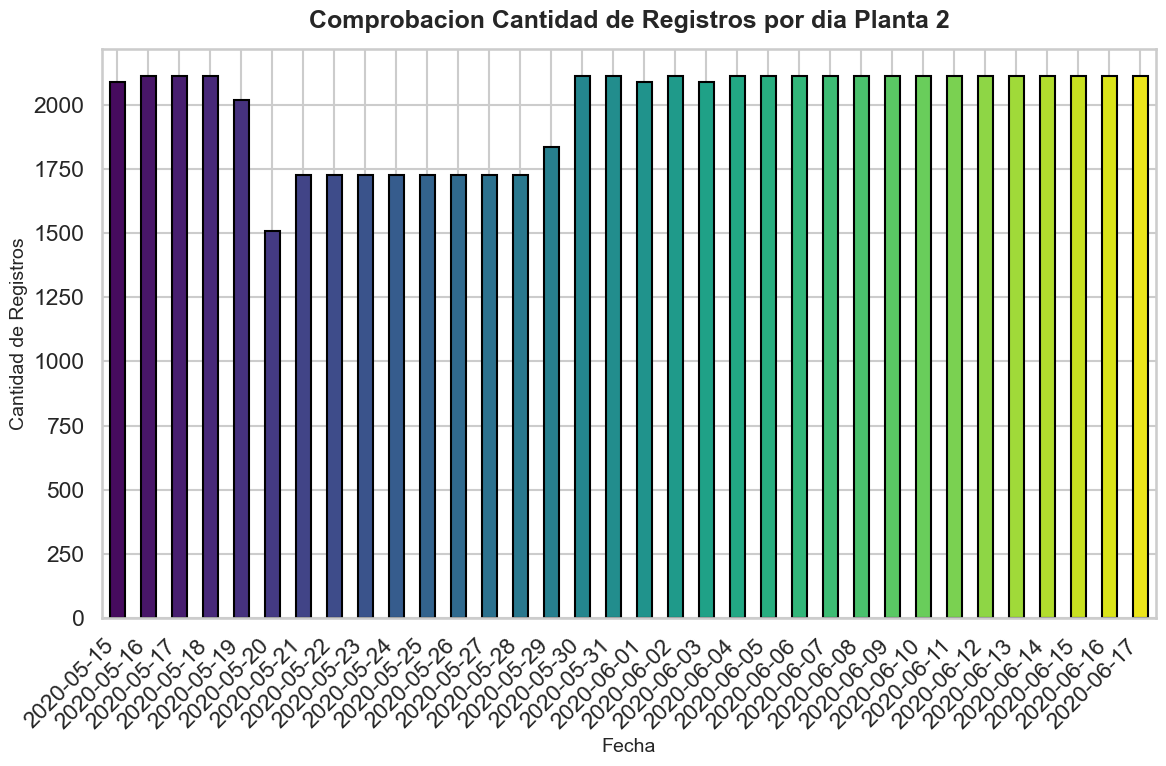

In [151]:
# Estilo estético y limpio
sns.set(style='whitegrid', context='talk')

# Crear la serie de conteo ordenada por fecha
date_counts = p2g.DATE_TIME.dt.date.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8)) 
date_counts.plot.bar(color=sns.color_palette("viridis", len(date_counts)), edgecolor='black')

# Títulos y etiquetas
plt.title('Comprobacion Cantidad de Registros por dia Planta 2', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=14)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar los márgenes
plt.tight_layout()
plt.show()

#### 1.3.2.2 Sensores Planta 2

In [152]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [153]:
p2w.DATE_TIME = pd.to_datetime(p2w.DATE_TIME)
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [154]:
p2w.head(2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00


In [155]:
p2w['PLANT_ID'] = p2w.PLANT_ID.replace(4136001,'p2')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p2,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,p2,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,p2,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,p2,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,p2,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [156]:
p1w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3182,2020-06-01 05:52:22.080452608,2020-05-15 00:00:00,2020-05-23 22:48:45,2020-06-01 09:52:30,2020-06-09 16:56:15,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3182.00,25.53,20.40,22.71,24.61,27.92,35.25,3.35
MODULE_TEMPERATURE,3182.00,31.09,18.14,21.09,24.62,41.31,65.55,12.26
IRRADIATION,3182.00,0.23,0.00,0.00,0.02,0.45,1.22,0.30


In [157]:
p2w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3259,2020-06-01 00:04:35.053697536,2020-05-15 00:00:00,2020-05-23 12:07:30,2020-06-01 00:00:00,2020-06-09 12:07:30,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3259.00,28.07,20.94,24.60,26.98,31.06,39.18,4.06
MODULE_TEMPERATURE,3259.00,32.77,20.27,23.72,27.53,40.48,66.64,11.34
IRRADIATION,3259.00,0.23,0.00,0.00,0.02,0.44,1.10,0.31


- Las temperaturas y las irradiaciones son muy similares.

In [158]:
p2w.SOURCE_KEY.nunique()

1

In [159]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   object        
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 152.9+ KB


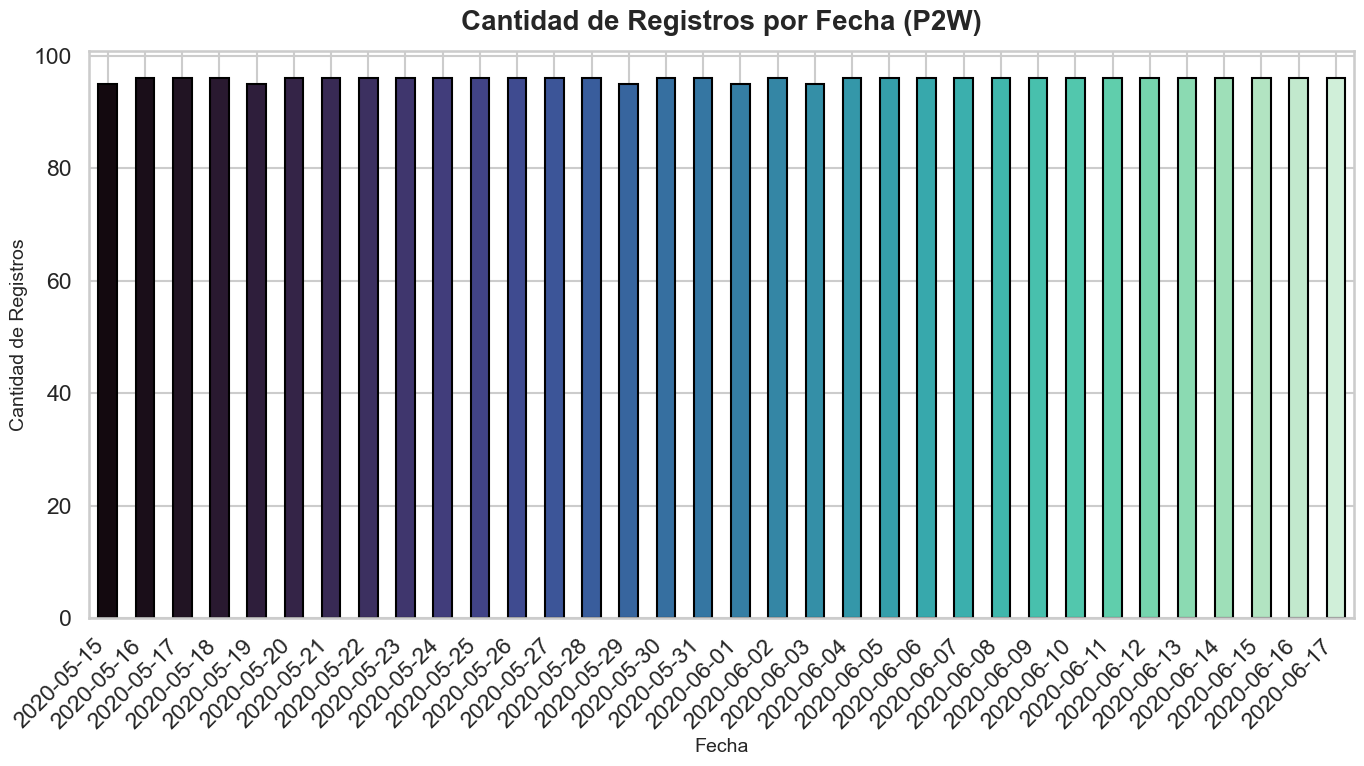

In [160]:
# Estilo más profesional
sns.set(style='whitegrid', context='talk')

# Conteo de fechas
date_counts = p2w.DATE_TIME.dt.date.value_counts().sort_index()

# Crear figura
plt.figure(figsize=(14, 8))

# Gráfico de barras
date_counts.plot.bar( color=sns.color_palette("mako", len(date_counts)), edgecolor='black')

# Títulos y etiquetas
plt.title('Cantidad de Registros por Fecha (P2W)', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=14)

# Rotar las fechas si hay muchas
plt.xticks(rotation=45, ha='right')

# Ajuste de márgenes
plt.tight_layout()

# Mostrar
plt.show()

In [161]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  object        
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.6+ MB


## 1.4 Creacion del DataMart

### 1.4.1 Union datasets Generacion

Procedemos a unir los dos dataframes de Generacion y sensores concantenandolos para cada planta y luego se uniran mediante campo clave.

In [162]:
## Concatenacion de Generacion
gener = pd.concat([p1g,p2g], axis = 'index')

In [163]:
gener.columns = ['fecha','planta','inverter_id','kw_dc','kw_ac','kw_dia','kw_total']

In [164]:
gener

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


### 1.4.2 Control de coherencia dataset Generacion

* Comprobamos que las variables recogen la informacion que teoricamente deben tener.

* Concretamente que los kw_dia generados se incorporan correctamente al sumatorio total.

     - Para eso se creara un lag con el total del dia anterior y por diferencia entre dia actual y dia lag pasado, dia anterior podra comprobarse que la cantidad diaria añadida al sumatorio total es correcta.

* Faltaria averiguar porque la potencia dc y ac difieren en una tasa de 10, esto es, si es por una unidad de medida distinta  u otra razon.

In [165]:
gener2 = gener.copy()

Seleccionamos un dia para hacer nuestras comprobaciones

In [166]:
gener2['date'] = gener2.fecha.dt.date
gener2

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,date
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,2020-05-15
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,2020-05-15
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,2020-05-15
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,2020-05-15
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,2020-06-17
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,2020-06-17
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,2020-06-17
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,2020-06-17


In [167]:
gener2 = gener2.groupby(['planta','date','inverter_id']).agg({'kw_dc':'sum',
                                                              'kw_ac':'sum',
                                                              'kw_dia':'max',
                                                              'kw_total':'max'}).reset_index()
gener2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
1,p1,2020-05-15,1IF53ai7Xc0U56Y,258911.11,25343.29,6357.00,6190002.00
2,p1,2020-05-15,3PZuoBAID5Wc2HD,254766.05,24937.70,6274.00,6994033.00
3,p1,2020-05-15,7JYdWkrLSPkdwr4,250608.34,24533.91,6116.00,7609076.00
4,p1,2020-05-15,McdE0feGgRqW7Ca,264030.98,25840.63,6471.00,7165435.00
...,...,...,...,...,...,...,...
1459,p2,2020-06-17,q49J1IKaHRwDQnt,17001.51,16655.15,4157.00,520758.00
1460,p2,2020-06-17,rrq4fwE8jgrTyWY,16073.93,15748.92,3931.00,121131356.00
1461,p2,2020-06-17,vOuJvMaM2sgwLmb,17710.00,17345.44,4322.00,2427691.00
1462,p2,2020-06-17,xMbIugepa2P7lBB,17211.23,16860.38,5502.00,106896394.00


In [168]:
gener2 = gener2.sort_values(['planta','inverter_id','date'])
gener2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00
...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00


In [169]:
gener2['lag1'] = gener2.groupby(['planta','inverter_id']).kw_total.shift(1)
gener2['incremento'] = gener2.kw_total - gener2.lag1
gener2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag1,incremento
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00


In [170]:
# PLANTA 1 
gener2[gener2.planta == 'p1'].head(50)

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag1,incremento
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
110,p1,2020-05-20,1BY6WEcLGh8j5v7,230412.62,22516.26,8249.00,6298346.00,6290097.00,8249.00
132,p1,2020-05-21,1BY6WEcLGh8j5v7,288676.60,28223.13,7243.00,6305589.00,6298346.00,7243.00
154,p1,2020-05-22,1BY6WEcLGh8j5v7,280809.07,27456.63,6848.00,6312437.00,6305589.00,6848.00
176,p1,2020-05-23,1BY6WEcLGh8j5v7,326468.27,31922.93,7966.00,6320403.00,6312437.00,7966.00
198,p1,2020-05-24,1BY6WEcLGh8j5v7,309111.73,30220.37,7537.00,6327940.00,6320403.00,7537.00


In [171]:
# PLANTA 2
gener2[gener2.planta == 'p2'].head(50)

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag1,incremento
748,p2,2020-05-15,4UPUqMRk7TRMgml,17112.65,16744.08,9425.00,2433212.00,NaN,NaN
770,p2,2020-05-16,4UPUqMRk7TRMgml,23305.45,22791.22,5677.00,2438889.00,2433212.00,5677.00
792,p2,2020-05-17,4UPUqMRk7TRMgml,25985.95,25430.42,6342.00,2445231.00,2438889.00,6342.00
814,p2,2020-05-18,4UPUqMRk7TRMgml,31218.58,30516.03,7641.00,2452872.00,2445231.00,7641.00
836,p2,2020-05-19,4UPUqMRk7TRMgml,8040.00,7878.39,7641.00,2454841.00,2452872.00,1969.00
858,p2,2020-05-20,4UPUqMRk7TRMgml,9852.13,9641.35,9423.00,2464264.00,2454841.00,9423.00
880,p2,2020-05-21,4UPUqMRk7TRMgml,37403.77,36540.63,9423.00,2473415.00,2464264.00,9151.00
898,p2,2020-05-22,4UPUqMRk7TRMgml,40414.35,39472.14,9863.00,2483278.00,2473415.00,9863.00
916,p2,2020-05-23,4UPUqMRk7TRMgml,39690.66,38769.69,9863.00,2492966.00,2483278.00,9688.00
934,p2,2020-05-24,4UPUqMRk7TRMgml,18963.72,18558.18,9688.00,2497601.00,2492966.00,4635.00


###  1.4.3 Union datasets Mediciones Ambientales

In [172]:
temper = pd.concat([p1w,p2w], axis = 'index')
temper

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [173]:
# Renombramos las variables con nombres mas accesibles
temper.columns = ['fecha','planta','sensor_id','t_ambiente','t_modulo','irradiacion']
temper

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [174]:
df = pd.merge(left = gener, right = temper, how = 'left', on = ['fecha','planta'])
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [175]:
# Comprobaciones de union.
df.isna().sum()

fecha          0
planta         0
inverter_id    0
kw_dc          0
kw_ac          0
kw_dia         0
kw_total       0
sensor_id      4
t_ambiente     4
t_modulo       4
irradiacion    4
dtype: int64

**Conclusiones**

Tengo nulos en las variables de temperatura.

Hay algun momento en el que hay datos de generacion pero no de temperatura.

In [176]:
df[df.sensor_id.isna()]

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
38544,2020-06-03 14:00:00,p1,1IF53ai7Xc0U56Y,7003.00,685.80,5601.00,6330385.00,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,p1,adLQvlD726eNBSB,7204.00,705.40,5685.00,6419961.00,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,p1,wCURE6d3bPkepu2,7545.00,738.70,5579.00,6928448.00,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,p1,z9Y9gH1T5YWrNuG,7946.00,777.80,5541.00,7152815.00,NaN,NaN,NaN,NaN


In [177]:
# Todos los valores se concentran en un mismo momento del dia y para una misma planta.

In [178]:
temper[temper.fecha.between('2020-06-03 13:30:00','2020-06-03 14:30:00' )]

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
1797,2020-06-03 13:30:00,p1,HmiyD2TTLFNqkNe,28.56,48.78,0.75
1798,2020-06-03 13:45:00,p1,HmiyD2TTLFNqkNe,27.86,46.63,0.62
1799,2020-06-03 14:15:00,p1,HmiyD2TTLFNqkNe,28.36,50.63,0.72
1800,2020-06-03 14:30:00,p1,HmiyD2TTLFNqkNe,28.31,47.38,0.67
1874,2020-06-03 13:30:00,p2,iq8k7ZNt4Mwm3w0,28.60,37.68,0.41
1875,2020-06-03 13:45:00,p2,iq8k7ZNt4Mwm3w0,28.75,36.35,0.35
1876,2020-06-03 14:15:00,p2,iq8k7ZNt4Mwm3w0,30.45,45.63,0.76
1877,2020-06-03 14:30:00,p2,iq8k7ZNt4Mwm3w0,29.64,40.40,0.44


In [179]:
df.dropna(inplace = True)
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [180]:
df.isna().sum()

fecha          0
planta         0
inverter_id    0
kw_dc          0
kw_ac          0
kw_dia         0
kw_total       0
sensor_id      0
t_ambiente     0
t_modulo       0
irradiacion    0
dtype: int64

In [181]:
# Ajustamos fecha como indice
df.set_index('fecha', inplace = True)
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [182]:
df.to_csv('..//Datos/df_procesado.csv')